<a href="https://colab.research.google.com/github/dspohnholtz/cs4410/blob/main/spohnholtz_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Troy University, CS4410

Created By: Dan Spohnholtz

Homework 2

# **Loading the Dataset**
The load_diabetes function from the sklearn.datasets mdoule returns a Bunch object containing the data and other information from the dataset. DESCR is used to display the dataset's description. 

In [45]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Confirming the number of samples and features using the shape attribute.

In [46]:
diabetes.data.shape

(442, 10)

The shape attribute may be used to demonstrate that the number of target values matches the number of samples.

In [47]:
diabetes.target.shape

(442,)

Demonstrating the feature_names attribute.

In [48]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# **Exploring the Data with Pandas**
Pandas DataFrame may be used to explore the data. The initial DataFrame is created using data in diabetes.data and with the column names specified by diabetes.feature_names. An additional column to display the target data is added using diabetes.target. The head function is used to peek at the data. 

In [49]:
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('max_columns', 11)
pd.set_option('display.width', None)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['DiseaseProg'] = pd.Series(diabetes.target)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProg
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


Demonstrating use of the describe attribute to calculate the DataFrame's summary statistics.

In [50]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProg
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6343e-16,1.3083e-16,-8.0453e-16,1.2817e-16,-8.8353e-17,1.3270e-16,-4.5746e-16,3.7773e-16,-3.8309e-16,-3.4129e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


# **Data Visualization of Features**
Data visualization may be used to demonstrate how the target value relates to each feature. In the interest of clarity, the sample method is used to randomly select 10% of the 442 instances in the data set. After samples from each feature are taken, Matplotlib and Seaborn are used to display the data as scatter plots.  

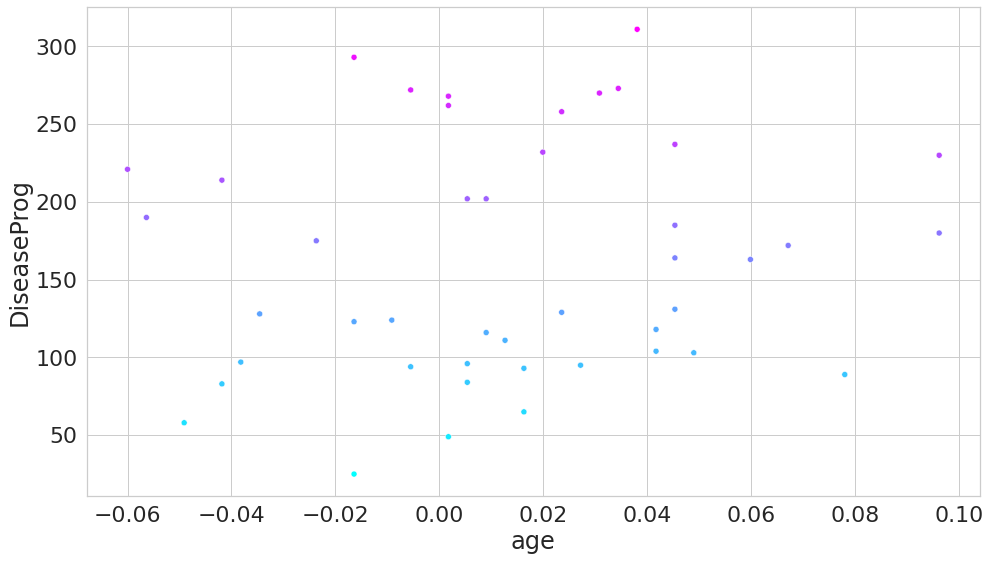

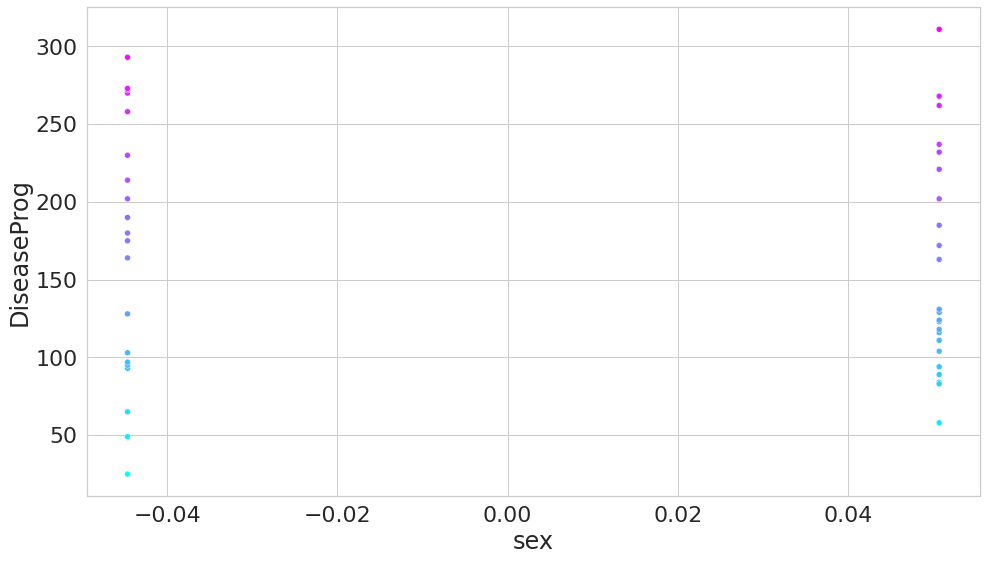

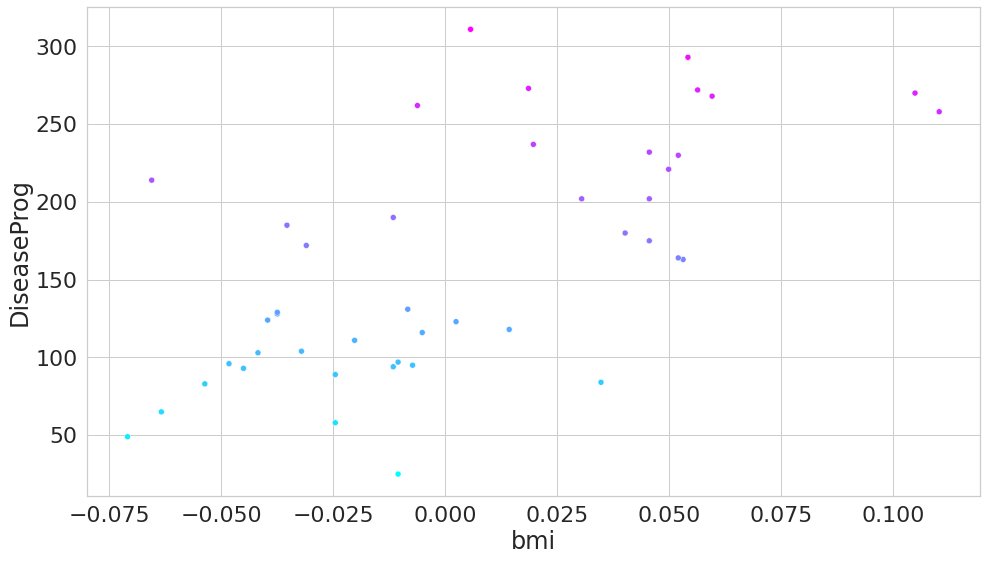

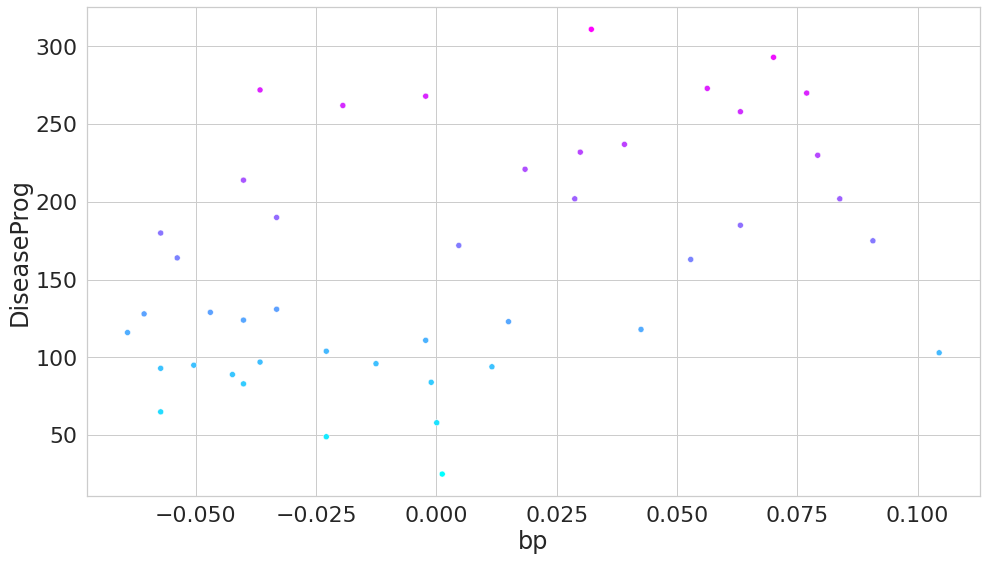

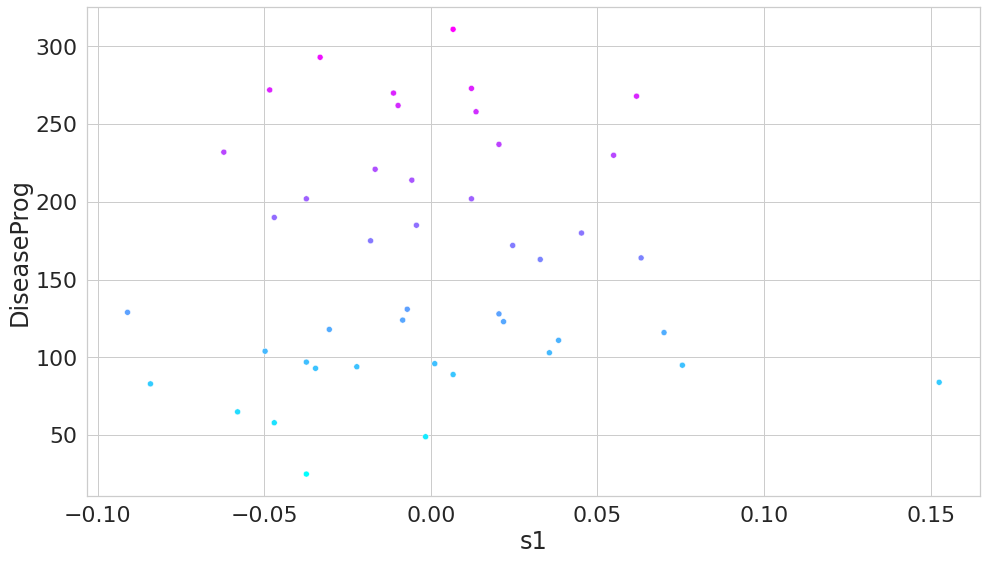

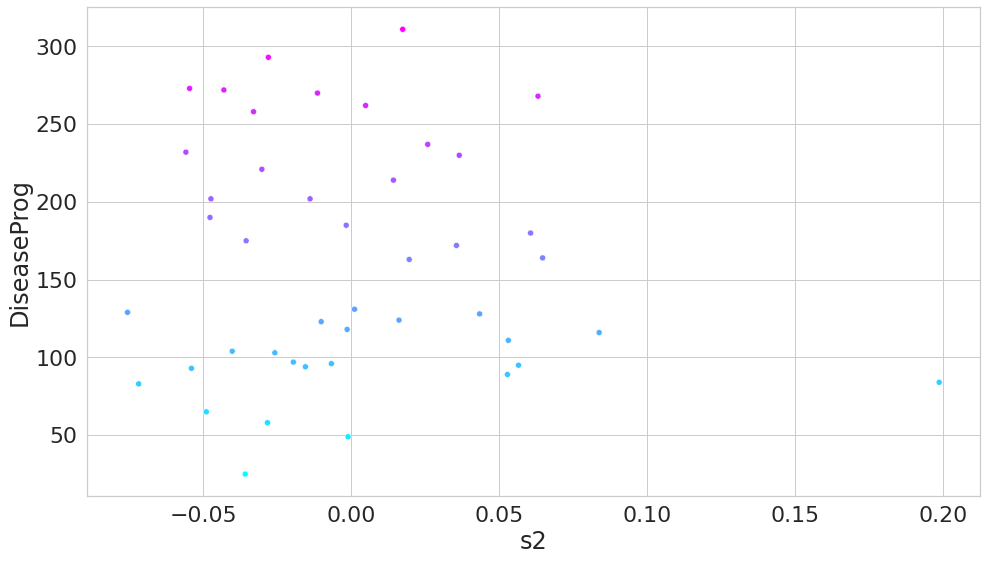

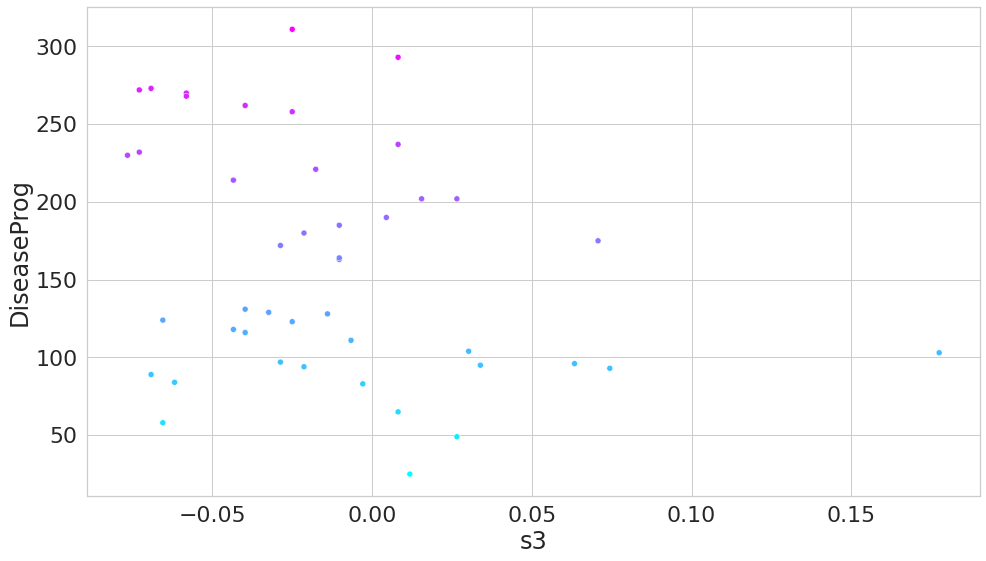

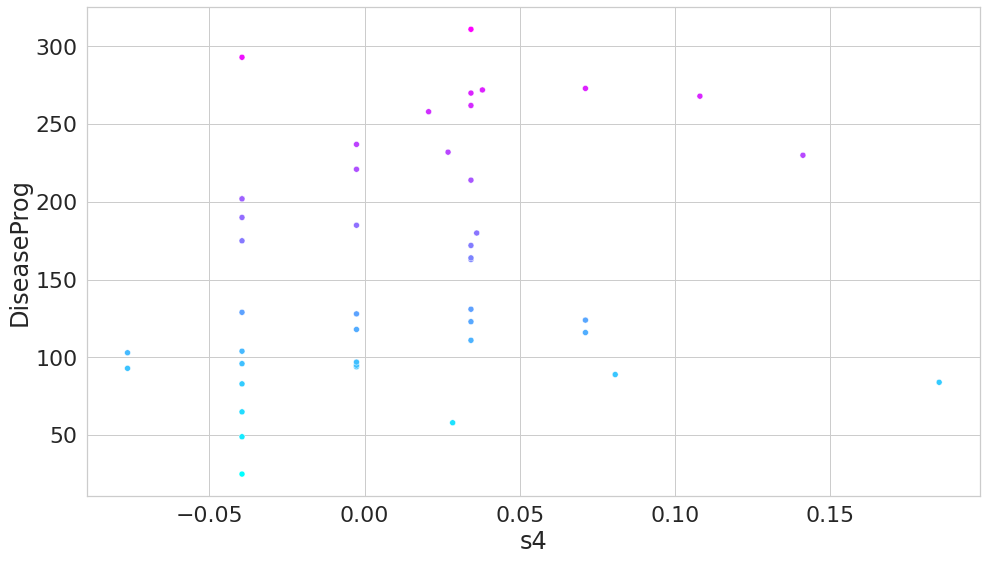

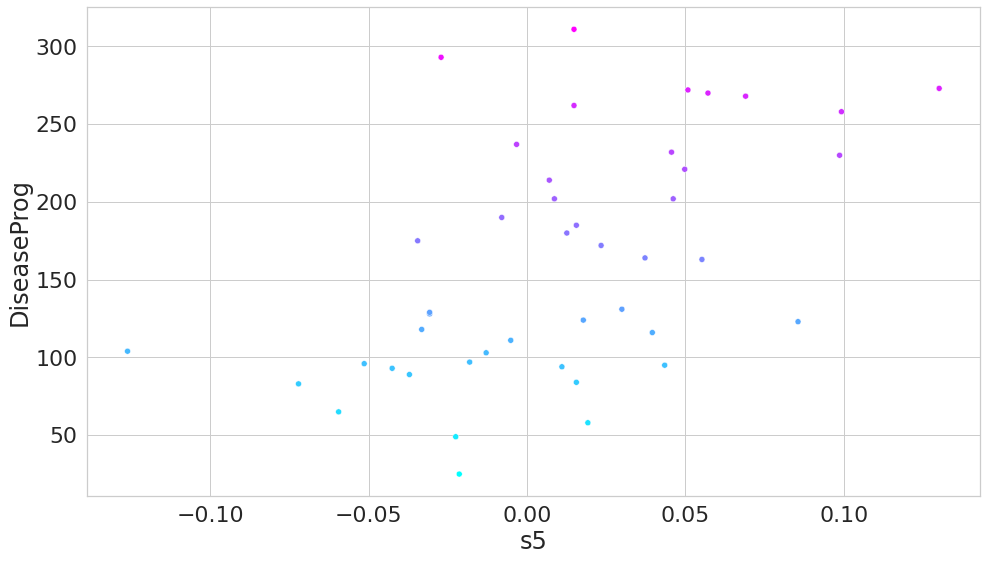

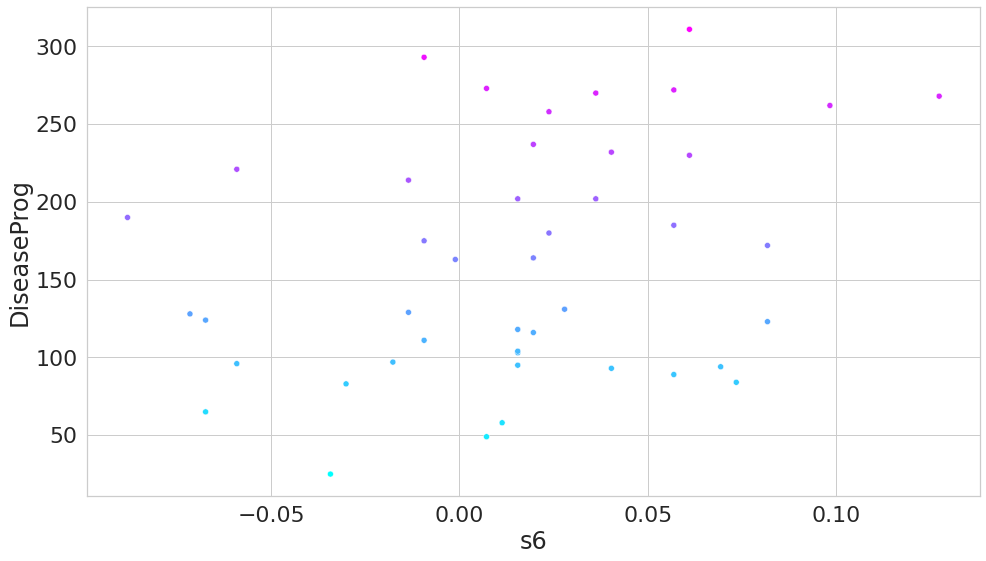

In [51]:
sample_df = diabetes_df.sample(frac=0.1, random_state=23)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
  plt.figure(figsize=(16, 9))
  sns.scatterplot(data=sample_df, x=feature, y='DiseaseProg', hue ='DiseaseProg', palette ='cool', legend=False)

# **Splitting the Data for Training and Testing**
The train_test_split function is used to break data into training and testing sets to prepare for training and testing the model. The shape attribute is used to check the size of both the train and test sets.

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=16)
x_train.shape 

(331, 10)

In [53]:
x_test.shape

(111, 10)

# **Training the Model**
Demonstrating a LinearRegression estimator. By default, LinearRegression estimators use all the features in a dataset's array to perform a multiple linear regression. Note, all features must be numeric. If any feature is categorical, the feature must be converted to a numeric feature or the feature must be excluded during the training process. All of the featurs in the diabetes dataset are numeric.  

In [54]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Multiple linear regression produces separate cofficients for each feature in the data set and one intercept. 

In [55]:
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -5.521040653265025
       sex: -287.1697084286656
       bmi: 500.2906440974226
        bp: 342.1613159616116
        s1: -958.5968474890875
        s2: 528.9263983231094
        s3: 190.05221697397937
        s4: 287.23549942582724
        s5: 767.4166447061043
        s6: 66.6921000430581


In [56]:
linear_regression.intercept_

151.2023374312516

Positive coefficients indicate a direct relationship between disease progression one year after baseline and value the feature value. Negative coefficients indicate an inverse relationship between the disease progression one year after baseline value and the feature value.  

# **Testing the Model**
The predict method may be used to test the model using test samples as an arguement. The array of predictions is stored in the predicted varible and the array of expected values is stored in the expected variable. The first ten predictions and their corresponding expected values are demonstrated. 

In [57]:
predicted = linear_regression.predict(x_test)
expected = y_test

predicted[:10]

array([150.64956884,  92.9737935 ,  98.05127701, 269.27112351,
       101.67295535, 154.17446767, 148.35337158, 188.10080598,
       199.09112713,  69.75570545])

In [58]:
expected[:10]

array([ 97., 115., 101., 346.,  69., 259.,  25., 233., 281.,  83.])

# **Visualizing the Expected vs. Predicted Outcomes**
Visualizing the expected and predicted disease progression one year after baseline illustrates the relationship between the two values. This may be achieved by creating DataFrames for the expected and predicted values and plotting the data on a scatter plot. A line is created to represent perfect predictions, or when an expected value matches a predicted value. 

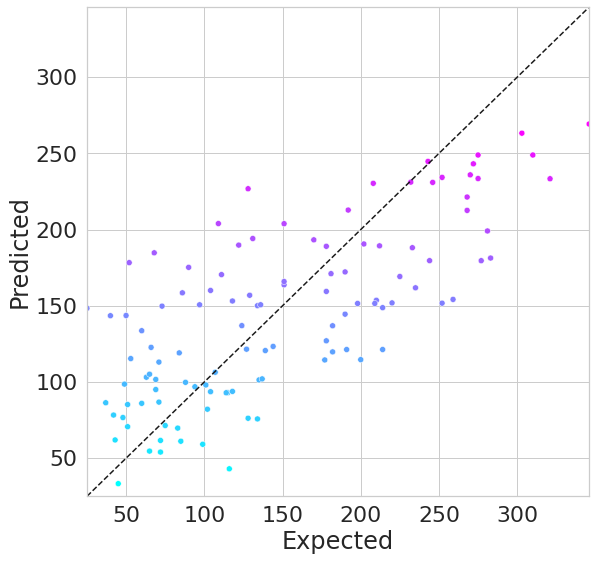

In [59]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue = 'Predicted', palette='cool', legend=False)

start=min(expected.min(), predicted.min())
end=max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

# **Regression Model Metrics**
The coefficient of determination, called an R2 score, determines how well an estimator predicts a dependent variable's value, given the independent variable. R2 scores are measured on a scale from 1.0 to 0, in which 1.0 indicates a perfect model, while scores closer to 0 suggest that the model can't make predictions with any accuracy. Another metric to measure a model's accuracy is the mean squared error. This metric uses the average squared difference between the expected and predicted values to indicate accuracy. When comparing estimators with the mean squared error metric, the one with the value closest to 0 best fits the data. In this case, the R2 value is closest to 0, therefore it is the best representation of the data.   

In [60]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.5342853848873155

In [61]:
metrics.mean_squared_error(expected, predicted)

2906.3166812962645

# **Choosing the Best Model**
To ensure that the LinearRegression estimator provides the best results, it should be compared against the results of other estimators. Estimators are compared using k-fold cross-validation with a KFold object and the cross_val_score fuction. This approch produces the R2 scores for each estimator for comparison. In this case, the LinearRegression estimator provides the R2 scroe closest to 1 and is therefore the best model for this data. 

In [62]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')


LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
